In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('engine_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
#derive new features from existing features
data['Engine_power'] = data['Engine rpm'] * data['Lub oil pressure']
data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Engine_power
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509,2620.923894
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679,1243.143436
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000,1.326572
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000,1739.171156
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000,2383.271067
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000,3265.915016
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000,11900.091888


In [ ]:
data['Temperature_difference'] = data['Coolant temp'] - data['lub oil temp']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912
Engine Condition,19535.0,0.630509,0.482679,0.000000,0.000000,1.000000,1.000000,1.000000
Engine_power,19535.0,2620.923894,1243.143436,1.326572,1739.171156,2383.271067,3265.915016,11900.091888
Temperature_difference,19535.0,0.784013,6.736925,-22.669427,-3.917997,0.744195,5.582887,119.008526


In [ ]:
data.drop(['Engine_power'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Engine rpm              19535 non-null  int64  
 1   Lub oil pressure        19535 non-null  float64
 2   Fuel pressure           19535 non-null  float64
 3   Coolant pressure        19535 non-null  float64
 4   lub oil temp            19535 non-null  float64
 5   Coolant temp            19535 non-null  float64
 6   Engine Condition        19535 non-null  int64  
 7   Temperature_difference  19535 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [ ]:
data.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition',
       'Temperature_difference'],
      dtype='object')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = data.drop(['Engine Condition'], axis=1)
y = data['Engine Condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6593294087535193


In [ ]:
#give f1 score report with precision and recall
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39      2926
           1       0.67      0.88      0.76      4888

    accuracy                           0.66      7814
   macro avg       0.63      0.58      0.58      7814
weighted avg       0.64      0.66      0.62      7814



In [ ]:
import pickle

# Save the model to a .pkl file
with open('lstm_engine_status_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Define threshold probability
threshold = 0.6  # Adjust as needed

# Identify indices where maintenance might be needed
maintenance_indices = []

for i in range(len(probabilities)):
    if probabilities[i] > threshold:
        maintenance_indices.append(i)

# Convert maintenance indices to a range of indices
maintenance_ranges = []
start_index = maintenance_indices[0]
for i in range(1, len(maintenance_indices)):
    if maintenance_indices[i] != maintenance_indices[i-1] + 1:
        end_index = maintenance_indices[i-1]
        maintenance_ranges.append((start_index, end_index))
        start_index = maintenance_indices[i]
end_index = maintenance_indices[-1]
maintenance_ranges.append((start_index, end_index))

# Convert index ranges to date ranges
maintenance_date_ranges = []
for start, end in maintenance_ranges:
    start_date = X_test.index[start]
    end_date = X_test.index[end]
    maintenance_date_ranges.append((start_date, end_date))

# Display maintenance date ranges
for start, end in maintenance_date_ranges:
    print("Maintenance might be needed between", start, "and", end)


Maintenance might be needed between 828 and 16075
Maintenance might be needed between 13967 and 5764
Maintenance might be needed between 4600 and 17333
Maintenance might be needed between 11277 and 11277
Maintenance might be needed between 9467 and 8503
Maintenance might be needed between 17201 and 17201
Maintenance might be needed between 1272 and 1272
Maintenance might be needed between 17516 and 385
Maintenance might be needed between 4949 and 3341
Maintenance might be needed between 15342 and 15342
Maintenance might be needed between 5963 and 14221
Maintenance might be needed between 5554 and 1522
Maintenance might be needed between 7551 and 12691
Maintenance might be needed between 16250 and 17149
Maintenance might be needed between 6670 and 11396
Maintenance might be needed between 7775 and 4447
Maintenance might be needed between 8941 and 8941
Maintenance might be needed between 9195 and 2388
Maintenance might be needed between 14129 and 9902
Maintenance might be needed between 

In [ ]:
thresholds = {
    'Engine rpm': 0.4,  # Lowered threshold assuming minor deviations might indicate potential issues.
    'Lub oil pressure': 0.7,  # Raised threshold to ensure early detection of lubrication system issues.
    'Fuel pressure': 0.6,  # Kept threshold unchanged assuming moderate deviations are indicative of potential problems.
    'Coolant pressure': 0.7,  # Raised threshold to detect cooling system issues more sensitively.
    'lub oil temp': 0.65,  # Slightly raised threshold to detect temperature anomalies earlier.
    'Coolant temp': 0.6,  # Kept threshold unchanged assuming moderate deviations might indicate potential issues.
    'Temperature_difference': 0.65  # Slightly raised threshold for early detection of temperature gradient anomalies.
}



# Make probabilistic predictions
probabilities = model.predict_proba(X_test)[:, 1]
print(probabilities) # Probabilities for class 1

# Identify indices where maintenance might be needed for each parameter
maintenance_indices = {}

for parameter, threshold in thresholds.items():
    parameter_indices = []
    for i in range(len(probabilities)):
        if probabilities[i] > threshold:
            parameter_indices.append(i)
    maintenance_indices[parameter] = parameter_indices

# Convert maintenance indices to a range of indices for each parameter
maintenance_ranges = {}

for parameter, indices in maintenance_indices.items():
    parameter_ranges = []
    start_index = indices[0]
    for i in range(1, len(indices)):
        if indices[i] != indices[i-1] + 1:
            end_index = indices[i-1]
            parameter_ranges.append((start_index, end_index))
            start_index = indices[i]
    end_index = indices[-1]
    parameter_ranges.append((start_index, end_index))
    maintenance_ranges[parameter] = parameter_ranges

# Convert index ranges to number of days for each parameter
maintenance_days = {}

for parameter, ranges in maintenance_ranges.items():
    parameter_days = []
    for start, end in ranges:
        num_days = end - start + 1
        parameter_days.append(num_days)
    maintenance_days[parameter] = parameter_days

# Display maintenance duration in days for each parameter
for parameter, days in maintenance_days.items():
    print("Maintenance might be needed for", parameter, "for", days, "days")

[0.64611772 0.78816762 0.52699763 ... 0.44884072 0.65978355 0.51294328]
Maintenance might be needed for Engine rpm for [16, 6, 11, 2, 11, 8, 13, 25, 6, 6, 8, 17, 3, 3, 11, 5, 14, 78, 18, 21, 14, 20, 14, 25, 32, 1, 2, 3, 13, 11, 3, 1, 9, 8, 4, 8, 1, 2, 2, 10, 5, 55, 6, 1, 11, 12, 41, 1, 4, 18, 8, 2, 38, 4, 4, 14, 4, 2, 4, 2, 7, 3, 7, 10, 18, 5, 1, 16, 5, 4, 5, 13, 1, 1, 2, 10, 3, 23, 4, 3, 12, 8, 32, 5, 3, 6, 6, 8, 8, 8, 29, 8, 59, 14, 12, 2, 35, 9, 10, 12, 12, 29, 7, 13, 2, 4, 4, 2, 14, 5, 8, 23, 23, 4, 9, 6, 3, 36, 2, 39, 3, 2, 45, 5, 9, 5, 4, 4, 29, 27, 7, 12, 1, 18, 12, 15, 8, 13, 4, 2, 2, 1, 40, 11, 16, 22, 8, 20, 2, 1, 29, 6, 23, 24, 12, 1, 8, 53, 16, 5, 34, 5, 5, 5, 1, 5, 30, 25, 31, 4, 3, 9, 12, 37, 6, 2, 14, 36, 19, 9, 7, 12, 9, 12, 23, 2, 33, 19, 8, 6, 13, 4, 14, 2, 14, 36, 14, 14, 10, 11, 7, 5, 4, 25, 12, 11, 17, 15, 1, 39, 3, 13, 9, 1, 2, 3, 6, 23, 21, 2, 43, 4, 28, 2, 5, 14, 31, 8, 1, 10, 14, 1, 8, 37, 26, 2, 9, 23, 28, 1, 10, 27, 2, 23, 7, 10, 9, 9, 4, 11, 12, 5, 2, 5, 12,

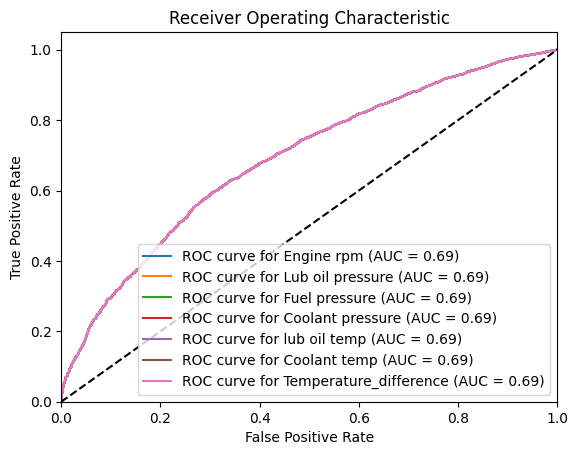

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each parameter
roc_curves = {}
for parameter in thresholds.keys():
    fpr, tpr, _ = roc_curve(y_test, probabilities)  # Assuming y_test is your true labels
    roc_auc = auc(fpr, tpr)
    roc_curves[parameter] = (fpr, tpr, roc_auc)

# Plot ROC curve for each parameter
import matplotlib.pyplot as plt

plt.figure()
for parameter, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label='ROC curve for %s (AUC = %0.2f)' % (parameter, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Display maintenance duration in weeks for each parameter
for parameter, days_list in maintenance_days.items():
    weeks_list = [int(days / 7) if days > 7 else 0 for days in days_list]
    print("Maintenance might be needed for", parameter, "for", weeks_list, "weeks")

Maintenance might be needed for Engine rpm for [2, 0, 1, 0, 1, 1, 1, 3, 0, 0, 1, 2, 0, 0, 1, 0, 2, 11, 2, 3, 2, 2, 2, 3, 4, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 7, 0, 0, 1, 1, 5, 0, 0, 2, 1, 0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 4, 0, 0, 0, 0, 1, 1, 1, 4, 1, 8, 2, 1, 0, 5, 1, 1, 1, 1, 4, 0, 1, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 1, 0, 0, 5, 0, 5, 0, 0, 6, 0, 1, 0, 0, 0, 4, 3, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 5, 1, 2, 3, 1, 2, 0, 0, 4, 0, 3, 3, 1, 0, 1, 7, 2, 0, 4, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0, 1, 1, 5, 0, 0, 2, 5, 2, 1, 0, 1, 1, 1, 3, 0, 4, 2, 1, 0, 1, 0, 2, 0, 2, 5, 2, 2, 1, 1, 0, 0, 0, 3, 1, 1, 2, 2, 0, 5, 0, 1, 1, 0, 0, 0, 0, 3, 3, 0, 6, 0, 4, 0, 0, 2, 4, 1, 0, 1, 2, 0, 1, 5, 3, 0, 1, 3, 4, 0, 1, 3, 0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 3, 1, 0, 4, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 3, 5, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 1, 0, 1, 2, 6, 0, 1, 0, 0, 1, 6, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 

In [ ]:
# Initialize a dictionary to store the maintenance classification for each parameter
maintenance_classification = {}

# Identify maintenance classification for each parameter based on the thresholds
for parameter, threshold in thresholds.items():
    parameter_classification = []
    for probability in probabilities:
        if probability > threshold:
            parameter_classification.append(1)  # Maintenance might be needed
        else:
            parameter_classification.append(0)  # No maintenance needed
    maintenance_classification[parameter] = parameter_classification

# Display maintenance classification for each parameter
for parameter, classification in maintenance_classification.items():
    print("Maintenance classification for", parameter, ":", classification)

# Initialize a list of dictionaries to store maintenance classification for each vehicle
vehicle_maintenance_classification = []

# Populate maintenance classification for each vehicle
for i in range(len(probabilities)):
    vehicle_classification = {}
    for parameter, classification in maintenance_classification.items():
        vehicle_classification[parameter] = classification[i]
    vehicle_maintenance_classification.append(vehicle_classification)

# Display maintenance classification for each vehicle
for i, vehicle_classification in enumerate(vehicle_maintenance_classification):
    print("Maintenance classification for Vehicle", i+1, ":", vehicle_classification)

# Initialize a list to store the overall maintenance classification for each vehicle
overall_maintenance = []

# Identify overall maintenance classification for each vehicle based on the maintenance classification for each parameter
for vehicle_classification in vehicle_maintenance_classification:
    if any(value == 1 for value in vehicle_classification.values()):
        overall_maintenance.append(1)  # Maintenance might be needed
    else:
        overall_maintenance.append(0)  # No maintenance needed

# Display overall maintenance classification for each vehicle
for i, maintenance_needed in enumerate(overall_maintenance):
    print("Overall maintenance classification for Vehicle", i+1, ":", maintenance_needed)

Streaming output truncated to the last 5000 lines.
Overall maintenance classification for Vehicle 2815 : 1
Overall maintenance classification for Vehicle 2816 : 1
Overall maintenance classification for Vehicle 2817 : 1
Overall maintenance classification for Vehicle 2818 : 0
Overall maintenance classification for Vehicle 2819 : 1
Overall maintenance classification for Vehicle 2820 : 1
Overall maintenance classification for Vehicle 2821 : 1
Overall maintenance classification for Vehicle 2822 : 0
Overall maintenance classification for Vehicle 2823 : 1
Overall maintenance classification for Vehicle 2824 : 1
Overall maintenance classification for Vehicle 2825 : 1
Overall maintenance classification for Vehicle 2826 : 1
Overall maintenance classification for Vehicle 2827 : 1
Overall maintenance classification for Vehicle 2828 : 1
Overall maintenance classification for Vehicle 2829 : 1
Overall maintenance classification for Vehicle 2830 : 1
Overall maintenance classification for Vehicle 2831 :

In [ ]:
# Dictionary containing binary values for each parameter
binary_values = {'Engine rpm': 1, 'Lub oil pressure': 0, 'Fuel pressure': 1, 'Coolant pressure': 0, 'lub oil temp': 0, 'Coolant temp': 1, 'Temperature_difference': 0}

# Dictionary containing weights for each parameter
weights = {'Engine rpm': 0.07, 'Lub oil pressure': 0.21, 'Fuel pressure': 0.14, 'Coolant pressure': 0.7, 'lub oil temp': 0.14, 'Coolant temp': 0.21, 'Temperature_difference': 0.7}

# Calculate the weighted sum
weighted_sum = sum(binary_values[param] * weights[param] for param in binary_values)

# Display the weighted sum
print("Weighted sum:", weighted_sum)

Weighted sum: 0.42000000000000004
